Se importa todo lo necesario

In [2]:
#numpy
import numpy as np

#sklearn
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

#pyclustering
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils import read_sample

#silhouette to evaluate clusterization quality
from pyclustering.cluster.silhouette import silhouette
import dataScienceUtils as ut

#pandas for database usage of data
import pandas as pd

#graphing libraries
import matplotlib.pyplot as plt #gráficos
import seaborn as sns

Se define el path

In [3]:
#define basic info
path='rawDataToFormattedData\\PorCentrosDeSalud\\formattedData.txt'

Se leen y se preprocesan los datos

In [4]:
# load list of points for cluster analysis
init_sample = read_sample(path)
number_of_data_points=len(init_sample)
#preprocessing
norm_sample=preprocessing.normalize(np.asarray(init_sample))

Se definen funciones necesarias para el algoritmo genetico

In [5]:
def get_random_individual(sample, k):
    return kmeans_plusplus_initializer(sample,k, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

def compute_score(individual,sample):
    kmeans_instance = kmeans(sample,individual)
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    dirtyscore = silhouette(sample, clusters).process().get_score()
    score=[x if str(x)!='nan' else 0 for x in dirtyscore]
    return np.mean(np.asarray(score))

def custom_sort(individual):
    return -individual[1]

def cross(individual1,individual2,sample):
    minimum_length=min(len(individual1[0]),len(individual2[0]))
    maximum_length=max(len(individual1[0]),len(individual2[0]))
    new_individual=[]
    for i in range(minimum_length):
        new_individual.append((individual1[0][i]+individual2[0][i])/2)
    for i in range(minimum_length+1,(minimum_length+maximum_length)//2):
        if len(individual1[0])==maximum_length:
            new_individual.append(individual1[0][i])
        else:
            new_individual.append(individual2[0][i])
    return (new_individual,compute_score(new_individual,sample))            

Se definen hiperparametros del algoritmo genetico

In [6]:
base_individuals=100
number_of_keis=1
number_of_clusters_k=4
lucky_individuals=10
generations=30

Se inicializa la poblacion

In [7]:
poblation=[get_random_individual(norm_sample,k)  for i in range(base_individuals) for k in range(number_of_clusters_k,number_of_keis+number_of_clusters_k)]
poblation=[(x,compute_score(x,norm_sample)) for x in poblation]
poblation.sort(key=custom_sort)

Se corre el algoritmo genetico

In [8]:
for t in range(30):
    ofspring=[]
    for i,x in enumerate(poblation):
        for j,y in enumerate(poblation):
            if i<j and i<lucky_individuals and j<lucky_individuals:
                ofspring.append(cross(x,y,norm_sample))
    for of in ofspring:
        poblation.append(of)
    poblation.sort(key=custom_sort)
    poblation=poblation[:base_individuals]

Se computan los agrupamientos del mejor individuo

In [9]:
kmeans_instance = kmeans(norm_sample,poblation[0][0])
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
print(poblation[0][1])
for clusteri in clusters:
    print(clusteri)

0.367987235333441
[1, 5, 8, 11, 12, 13, 18]
[0, 3, 4, 6, 7, 9, 10, 14, 15, 16, 17]
[19, 20, 21]
[2]


Se cargan las encuestas organizacionales por cada hospital en pandas

In [10]:
csvPath='rawDataToFormattedData\\PorCentrosDeSalud\\pandaData.csv'
hospitales=pd.read_csv(csvPath,sep=',')

In [11]:
visual_testing=np.asarray(init_sample);

In [12]:
visual_testing[5].reshape(27,7)

array([[ 0.,  0.,  2.,  4.,  3.,  2.,  4.],
       [ 0.,  0.,  0.,  1.,  6.,  5.,  3.],
       [ 0.,  1.,  0.,  3.,  2.,  6.,  3.],
       [ 0.,  0.,  2.,  3.,  6.,  2.,  2.],
       [ 2.,  0.,  2.,  4.,  6.,  1.,  0.],
       [ 3.,  0.,  1.,  1.,  7.,  3.,  0.],
       [ 0.,  0.,  2.,  1.,  6.,  4.,  2.],
       [ 0.,  0.,  3.,  4.,  6.,  1.,  1.],
       [ 0.,  1.,  3.,  2.,  5.,  4.,  0.],
       [ 2.,  2.,  5.,  1.,  3.,  2.,  0.],
       [10.,  2.,  3.,  0.,  0.,  0.,  0.],
       [ 3.,  1.,  8.,  2.,  1.,  0.,  0.],
       [ 0.,  3.,  2.,  4.,  3.,  2.,  1.],
       [ 0.,  1.,  2.,  5.,  3.,  3.,  1.],
       [11.,  2.,  0.,  1.,  1.,  0.,  0.],
       [ 4.,  1.,  6.,  2.,  1.,  1.,  0.],
       [ 2.,  2.,  0.,  4.,  4.,  3.,  0.],
       [ 1.,  3.,  4.,  3.,  3.,  1.,  0.],
       [ 5.,  2.,  6.,  0.,  2.,  0.,  0.],
       [ 1.,  3.,  7.,  1.,  1.,  1.,  1.],
       [ 3.,  2.,  5.,  1.,  1.,  3.,  0.],
       [ 8.,  4.,  3.,  0.,  0.,  0.,  0.],
       [ 2.,  1.,  4.,  5.,  3.,

In [13]:
hospitales[hospitales.ID==5]

,EVA,TD,MD,ED,NE,DA,MA,TA,HOSPITAL,ID
135,SAI1,0,0,2,4,3,2,4,CSC0,5
136,SAI2,0,0,0,1,6,5,3,CSC0,5
137,SAI3,0,1,0,3,2,6,3,CSC0,5
138,SAI4,0,0,2,3,6,2,2,CSC0,5
139,SAI5,2,0,2,4,6,1,0,CSC0,5
140,SAO1,3,0,1,1,7,3,0,CSC0,5
141,SAO2,0,0,2,1,6,4,2,CSC0,5
142,SAO3,0,0,3,4,6,1,1,CSC0,5
143,SAO4,0,1,3,2,5,4,0,CSC0,5
144,EI1,2,2,5,1,3,2,0,CSC0,5


In [14]:
for clusteri in clusters:
    nombres=[hospitales[hospitales.ID==i].iloc[0]['HOSPITAL'] for i in clusteri]
    print(nombres)

['CSBA', 'CSC0', 'CSMI', 'CSQAN', 'CSQCN', 'CSQMD', 'HFPS']
['CSB', 'CSCA', 'CSCA2', 'CSGU', 'CSME', 'CSMO', 'CSPR', 'CSSI', 'CSTE', 'CSTO', 'HCAÑ']
['HGUA', 'HLAP', 'HPM']
['CSBS']


Una vez obtenidos el agrupamiento, y la base de datos, se investiga sobre las similitudes y las diferencias de los grupos de acuerdo a sus resultados, primero se obtiene una calificacion para las variables intermedio

In [17]:
column1=[]
column2=[]
column3=[]
column4=[]
for index, row in hospitales.iterrows():
    column1.append(row['EVA'])
    column3.append(row['HOSPITAL'])
    column4.append(row['ID'])
    suma=row['TD']+row['MD']+row['ED']+row['NE']+row['DA']+row['MA']+row['TA']
    calificacion=0*row['TD']+row['MD']+2*row['ED']+3*row['NE']+4*row['DA']+5*row['MA']+6*row['TA']
    calificacion=calificacion/suma
    column2.append(calificacion)

basic_data = {'EVA':column1,'CALIFICACION':column2,'HOSPITAL':column3,'ID':column4}
hospitales_calificado = pd.DataFrame (basic_data, columns = ['EVA','CALIFICACION','HOSPITAL','ID'])

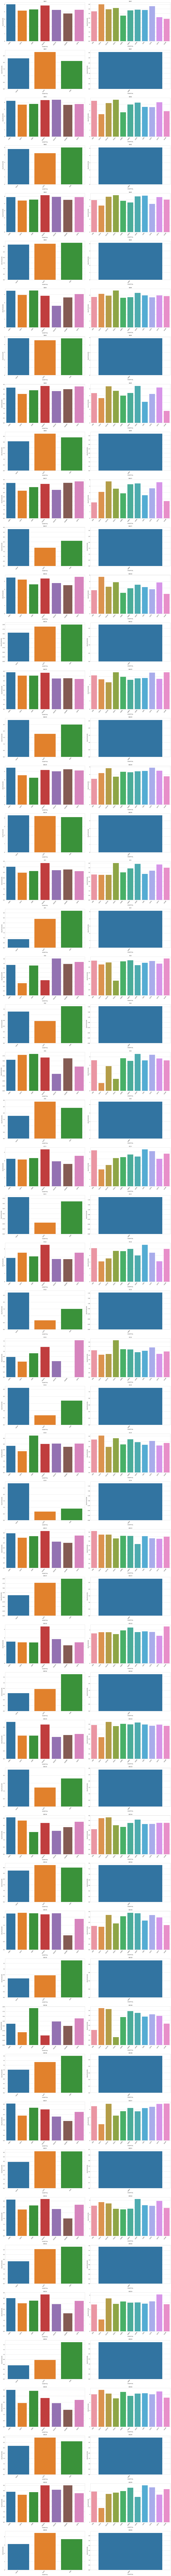

In [19]:
fig = plt.figure(figsize=(20,300))
variable_names=[]
for index,row in hospitales[hospitales.ID==0].iterrows():
    variable_names.append(row['EVA'])
var=1
for EVAName in variable_names:
    for i in range(len(clusters)):
        first=hospitales_calificado[hospitales_calificado['ID'].isin(clusters[i])]
        first=first[first['EVA']==EVAName]
        ax = fig.add_subplot(2*len(variable_names),len(clusters)/2, var) #Defino una tabla de 1 fila1 por 2 columnas, agrego el i-ésimo plot
        ax.set_xticklabels(ax.get_xticklabels(),rotation=50, ha="right")
        ax.set_xlabel('')
        graph = sns.barplot(x=first.columns[2], y=first.columns[1], data=first)
        plt.title(EVAName)
        var+=1
fig.tight_layout()

In [20]:
graph=graph.get_figure()
graph.savefig("graficasAnalisisOrganizacion.pdf", bbox_inches='tight')